In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
import netCDF4 as nc
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
data0 = #data primer intervalo a analizar
data1 = #data segundo intervalo a analizar

In [3]:
def RR_no(data0,data1):
    I = np.sort(data0.flatten())[::-1] #ordeno los primeros años de mayor a menor
    F = np.sort(data1.flatten())[::-1] #ordeno los ultimos años de mayor a menor
    n = len(I) #defino el tamaño
    pi = (np.arange(1,n+1)/n) #defino la probablilidad
    pf = np.zeros([n])
    for i in range(n):
        pf[i] = sum(1 for j in F if j>I[i])/n
    RR = [k / l for k, l in zip(pf, pi)]
    return I, RR
    

In [4]:
bins = 30

In [5]:
min_ = min(np.min(data0),np.min(data1))
max_ = max(np.max(data0),np.max(data1))
D = max_ -min_ 
Bins = np.arange(min_,max_,D / bins)

In [6]:
def RR(data0, data1, bins = bins):
    I = np.sort(data0.flatten())[::-1]
    F = np.sort(data1.flatten())[::-1]
    n = len(I)
    pi = np.zeros(bins)
    pf = np.zeros(bins)

    for i in range(bins):
        pi[i] = (sum(1 for j in I if j > Bins[i])) / n
        pf[i] = (sum(1 for j in F if j > Bins[i])) / n
    RR = [k / l if l != 0 else np.nan for k, l in zip(pf, pi)]  # Added a check for division by zero
    return RR

In [7]:
# CALCULO BARRAS DE ERROR
iteraciones = 1000
bs = np.zeros([bins, iteraciones])
for i in range(iteraciones):
    sample0 = data0[np.random.choice(data0.shape[0], data0.shape[0], replace=True)]
    sample1 = data1[np.random.choice(data1.shape[0], data1.shape[0], replace=True)]

    bs[:,i] = RR(sample0,sample1)
    
# Calcular los percentiles para cada bin
percentiles_values = np.nanpercentile(bs, [5,50,95], axis=1)

# Separar los percentiles en dos arrays diferentes
percentil_5 = percentiles_values[0]
percentil_50 = percentiles_values[1]
percentil_95 = percentiles_values[2]

/Users/tid/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


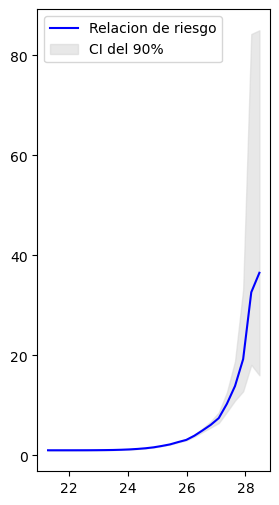

In [31]:
# Datos
P_5 = percentil_5
P_50 = percentil_50
P_95 = percentil_95

# Calcular las barras de error
error_lower = [p50 - p5 for p50, p5 in zip(P_50, P_5)]
error_upper = [p95 - p50 for p95, p50 in zip(P_95, P_50)]

# Ancho de las barras
bar_width = 0.35

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(3, 6))

# Grafica P_50 como una línea principal
plt.plot(Bins, P_50, label='Relacion de riesgo', color='blue')

# Rellena el área entre P_5 y P_95 para mostrar los márgenes de error
plt.fill_between(Bins, P_5, P_95, color='lightgray', alpha=0.5, label='CI del 90%')

# Mostrar la leyenda
ax.legend(loc='upper left')
# Mostrar el gráfico
plt.show()

